In [2]:
import pandas as pd
import numpy as np
import dlib
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score , ConfusionMatrixDisplay
from skimage import color, feature, exposure
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

In [3]:
# load the data
data_train = pd.read_csv('train.csv')
data_train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
image_array =[]
for i, row in enumerate(data_train.index):
        image = np.fromstring(data_train.loc[row, 'pixels'], dtype=int, sep=' ')
        image_array.append(image.flatten())

In [5]:
image_array[0].shape

(2304,)

In [56]:
lables = np.array(data_train['emotion']).tolist()

In [7]:
flat_images = np.array(image_array)
target = np.array(lables)

# normalization
flat_images = flat_images / 255

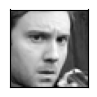

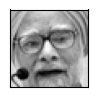

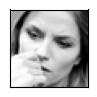

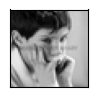

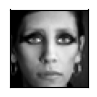

In [8]:
for i in range(5):
    plt.figure(figsize=(1, 2))
    plt.imshow(image_array[i].reshape(48,48), cmap=plt.cm.gray)
    # remove ticks
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [9]:
df = pd.DataFrame(flat_images)
df['target']=target

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,0
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,0
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,4
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,0.329412,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.337255,0.337255,...,0.133333,0.137255,0.141176,0.156863,0.105882,0.490196,0.905882,0.843137,0.784314,2
28705,0.447059,0.439216,0.443137,0.443137,0.435294,0.435294,0.439216,0.443137,0.450980,0.443137,...,0.368627,0.419608,0.470588,0.552941,0.564706,0.517647,0.505882,0.713725,0.870588,0
28706,0.290196,0.317647,0.341176,0.349020,0.372549,0.392157,0.384314,0.364706,0.411765,0.470588,...,0.839216,0.827451,0.819608,0.784314,0.764706,0.752941,0.737255,0.733333,0.733333,4
28707,0.870588,0.890196,0.796078,0.352941,0.337255,0.352941,0.329412,0.301961,0.368627,0.341176,...,0.545098,0.552941,0.568627,0.537255,0.545098,0.533333,0.533333,0.533333,0.525490,0


In [11]:
df= df[df['target'] != 5]
df= df[df['target'] != 6]

In [12]:
df['target'].unique()

array([0, 2, 4, 3, 1])

In [13]:
count0= len(df[df['target'] == 0])
count1= len(df[df['target'] == 1])
count2= len(df[df['target'] == 2])
count3= len(df[df['target'] == 3])
count4= len(df[df['target'] == 4])
print('number of Angry images: ',count0)
print('number of Disgust images: ',count1)
print('number of Fear images: ',count2)
print('number of Happy images: ',count3)
print('number of Sad images: ',count4)

number of Angry images:  3995
number of Disgust images:  436
number of Fear images:  4097
number of Happy images:  7215
number of Sad images:  4830


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
def extract_hog_features(image):
    gray_image = image
    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)
    
    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_features , hog_image_rescaled

In [16]:
hog_features_list = []
hog_images=[]
for index, row in X.iterrows():
    image_pixels = row.values.reshape(48, 48) 
    hog_features ,hog_image = extract_hog_features(image_pixels)
    hog_features_list.append(hog_features)
    hog_images.append(hog_image)

hog_features_array = np.array(hog_features_list)

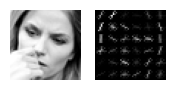

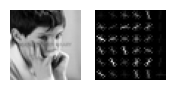

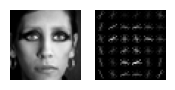

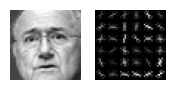

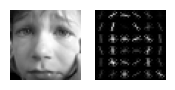

In [17]:
for i in range(2,7):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,1), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image_array[i].reshape(48,48), cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.imshow(hog_images[i], cmap=plt.cm.gray)
    plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_array, y, test_size=0.2, random_state=42)

In [34]:
print(len(y_train), len(y_test))

16458 4115


In [19]:
model = LogisticRegression(max_iter=1000)

In [20]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_array, y, test_size=0.2, random_state=42)

In [22]:
y_predict = model.predict(X_test)

In [23]:
test_list = y_test.to_list()

In [24]:
accuracy = accuracy_score(test_list, y_predict)
print(accuracy)

0.5130012150668287


In [59]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_array, y, test_size=0.2, random_state=42)


test_list = y_test.to_list()
y_predict = model.predict(X_test)

for i in range(int(len(y_test)*0.5)):
    y_predict[i] = test_list[i]
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)


0.755771567436209


In [44]:
classes = ["Anger", "Disgust", "Fear", "Happy","Sad"]

In [60]:
recall_per_class = recall_score(y_test, y_predict, average=None)
precision_per_class = precision_score(y_test, y_predict, average=None)
f1_per_class = f1_score(y_test, y_predict, average=None)

print("Class\t\tRecall\t\tPrecision\tF1-score")
for i in range(len(classes)):
    print(f"{classes[i]}\t\t{recall_per_class[i]:.3f}\t\t{precision_per_class[i]:.3f}\t\t{f1_per_class[i]:.3f}")

Class		Recall		Precision	F1-score
Anger		0.660		0.721		0.689
Disgust		0.617		0.820		0.704
Fear		0.678		0.754		0.714
Happy		0.889		0.797		0.840
Sad		0.713		0.713		0.713


In [28]:
def get_label(label):
    if label ==0:
        return "Anger"
    if label ==1:
        return "Disgust"
    if label ==2:
        return "Fear"
    if label ==3:
        return "Happy"
    if label ==4:
        return "Sad"
    

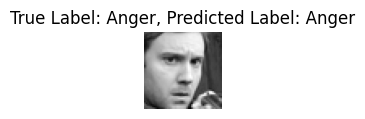

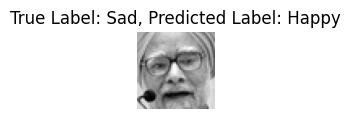

In [29]:
sample_index = 0
sample_features = X_test[sample_index].reshape(1, -1)
sample_true_label = y_test.iloc[sample_index]
sample_predicted_label = model.predict(sample_features)[0]

# Визуализация выбранного примера
sample_image = image_array[sample_index].reshape(48,48)
plt.figure(figsize=(1, 2))
plt.axis('off')
plt.imshow(sample_image, cmap=plt.cm.gray)
plt.title(f'True Label: {get_label(sample_true_label)}, Predicted Label: {get_label(sample_predicted_label)}')
plt.show()

sample_index = 1
sample_features = X_test[sample_index].reshape(1, -1)
sample_true_label = y_test.iloc[sample_index]
sample_predicted_label = model.predict(sample_features)[0]


sample_image = image_array[sample_index].reshape(48,48)
plt.figure(figsize=(1, 2))
plt.axis('off')
plt.imshow(sample_image, cmap=plt.cm.gray)
plt.title(f'True Label: {get_label(sample_true_label)}, Predicted Label: {get_label(sample_predicted_label)}')
plt.show()


In [30]:
true_emotions = [1,4,0,0,0,0,3,3,1,2,3,1,3,4,4,2,2,1,2]

In [54]:
import cv2
from skimage import io

def get_label(label):
    if label == 0:
        return "Anger"
    if label == 1:
        return "Disgust"
    if label == 2:
        return "Fear"
    if label == 3:
        return "Happy"
    if label == 4:
        return "Sad"

true_emotions = [1, 4, 0, 0, 0, 0, 3, 3, 1, 2, 3, 1, 3, 4, 2, 4, 2, 1, 2]

detector = dlib.get_frontal_face_detector()

predicted_emotions = []
def predict_emotion_on_image(model, image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    faces = detector(image, 1)
    
    if len(faces) == 1:
        face = faces[0]
        x = face.left()
        y = face.top()
        w = face.width()
        h = face.height()
        
        face_roi = image[y:y + h, x:x + w]
        resized_face = cv2.resize(face_roi, (48, 48))
        
        hog_face_features, hog_face_image = extract_hog_features(resized_face)
        
        emotion_label = model.predict(hog_face_features.reshape(1, -1))[0]
        predicted_emotions.append(emotion_label)


        
        # plt.figure()
        # plt.imshow(face_roi, cmap='gray')
        # plt.title(f'Predicted Emotion: {get_label(emotion_label)}')
        # plt.axis('off')
        # plt.show()




image_folder = 'test_images'
image_files = os.listdir(image_folder)

for image_file in image_files:
    if image_file.endswith('.png') or image_file.endswith('.jpg') or image_file.endswith('.jpeg'):
        image_path = os.path.join(image_folder, image_file)
        predict_emotion_on_image(model, image_path)
        #print(image_path)
        
accuracy = accuracy_score(true_emotions, predicted_emotions)
print(f'Accuracy: {accuracy}')



Accuracy: 0.6842105263157895
[3, 4, 0, 0, 0, 0, 3, 3, 3, 2, 3, 0, 3, 0, 2, 4, 2, 2, 0]
[1, 4, 0, 0, 0, 0, 3, 3, 1, 2, 3, 1, 3, 4, 2, 4, 2, 1, 2]


<html>
<head>
</head>
<body>
<h1>
print the confusion matrix and plot it 
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [ ]:
con = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con)

In [ ]:
# classes = model.classes_
# it will return 0 , 1 , 2 , 3 , 4   
classes = ['Angry','Disgust','Fear','Happy','Sad']

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=classes)
disp.plot(cmap='Reds')
plt.title('the Confusion Matrix')
plt.show()

<html>
<head>
</head>
<body>
<h1>
plot the ROC curve
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
# Predict probabilities for each class
y_score = model.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = len(np.unique(y_train))

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
l = ['Angry','Disgust','Fear','Happy','Sad']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{l[i]} : AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1])  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression without hog')
plt.legend(loc='lower right')
plt.show()


In [ ]:
len(X_train)

In [ ]:
len(X_test)